In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
# list for column headers
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=names)

* explore the dataset
    - head
    - shape

In [4]:
df.shape

(768, 9)

* create X and y (the goal is to predict column **class** based on other variables)

In [8]:
y=df['class']
X=df.drop(['class'],axis=1)

* split data set to train set and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

* import RandomForestClassifier from sklearn

In [10]:
from sklearn.ensemble import RandomForestClassifier


* create model

In [11]:
clf=RandomForestClassifier(n_estimators=100)

* fit training set with default parameters

In [12]:
clf.fit(X_train,y_train)

RandomForestClassifier()

* predict X_test

In [13]:
y_pred=clf.predict(X_test)

* import roc_auc_score and confusion_matrix from sklearn

In [14]:
from sklearn.metrics import roc_auc_score, confusion_matrix

* print confusion matrix

In [16]:
cnf_matrix=confusion_matrix(y_test, y_pred)
cnf_matrix

array([[128,  18],
       [ 33,  52]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

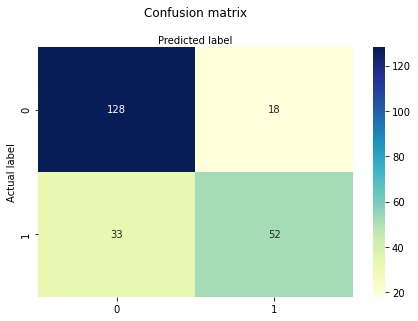

In [17]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

* print AUC

In [18]:
roc_auc_score(y_test, y_pred)

0.7442385173247381

* import GridSearchCV from sklearn

In [19]:
from sklearn.model_selection import RandomizedSearchCV

* create grid (optimize for number of trees and max depth in one tree)

In [22]:
param_grid ={'n_estimators': [100,200,300,400,500],
            'max_depth': [1,2,3,4,5,6,10]}

* fit training data with grid search

In [23]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

* print confusion matrix with the best model

In [24]:
rf_random.fit(X_train, y_train)

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 35 is smaller than n_iter=100. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 35 candidates, totalling 105 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 200, 'max_depth': 4}

* print AUC with the best model

- is the model better than default?

In [26]:
clf=RandomForestClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7353746978243353